# Importing Libraries and Dependencies

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime

import warnings
warnings.filterwarnings('ignore')

from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

# Dataset

Source: https://www.kaggle.com/datasets/arnavsmayan/netflix-userbase-dataset

## Importing Data

In [83]:
df = pd.read_csv('Dataset/Netflix Userbase.csv')
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


## Data Wrangling

In [84]:
# Change column name to upper case and replace space with underscore
df.columns = [col.replace(' ', '_').upper() for col in df.columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   USER_ID            2500 non-null   int64 
 1   SUBSCRIPTION_TYPE  2500 non-null   object
 2   MONTHLY_REVENUE    2500 non-null   int64 
 3   JOIN_DATE          2500 non-null   object
 4   LAST_PAYMENT_DATE  2500 non-null   object
 5   COUNTRY            2500 non-null   object
 6   AGE                2500 non-null   int64 
 7   GENDER             2500 non-null   object
 8   DEVICE             2500 non-null   object
 9   PLAN_DURATION      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [85]:
df.head()

,USER_ID,SUBSCRIPTION_TYPE,MONTHLY_REVENUE,JOIN_DATE,LAST_PAYMENT_DATE,COUNTRY,AGE,GENDER,DEVICE,PLAN_DURATION
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [86]:
df.isnull().sum()

USER_ID              0
SUBSCRIPTION_TYPE    0
MONTHLY_REVENUE      0
JOIN_DATE            0
LAST_PAYMENT_DATE    0
COUNTRY              0
AGE                  0
GENDER               0
DEVICE               0
PLAN_DURATION        0
dtype: int64

In [87]:
# Convert Join Date and Last Payment Date into Datetime

df['JOIN_DATE'] = pd.to_datetime(df['JOIN_DATE'])
df['LAST_PAYMENT_DATE'] = pd.to_datetime(df['LAST_PAYMENT_DATE'])

In [88]:
# Create an Age Category column
# Create a new column called 'Age Category' and assign values based on the age of the person.

# Create a function to assign the age category
def age_category(age):
    if age < 30:
        return 'Young Adult'
    elif age >= 30 and age < 40:
        return 'Adult'
    elif age >= 40 and age < 50:
        return 'Middle Aged Adult'
    else:
        return 'Senior Adult'

# Apply the function to the age column
df['AGE_CATEGORY'] = df['AGE'].apply(age_category)

In [89]:
# Use SQL to create a dataset that shows the status of the user subscription that will be joined later
# Use CASE WHEN to categorize the user status

user_status = pysqldf(
    """
    SELECT 
        USER_ID,
        CASE 
            WHEN LAST_PAYMENT_DATE < '2023-11-01' THEN 'CANCELLED'
            ELSE 'ACTIVE'
        END AS STATUS
    FROM df
    """
)

# Joining the dataset
df= pd.merge(df, user_status, on='USER_ID', how='left')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 2499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   USER_ID            2500 non-null   int64         
 1   SUBSCRIPTION_TYPE  2500 non-null   object        
 2   MONTHLY_REVENUE    2500 non-null   int64         
 3   JOIN_DATE          2500 non-null   datetime64[ns]
 4   LAST_PAYMENT_DATE  2500 non-null   datetime64[ns]
 5   COUNTRY            2500 non-null   object        
 6   AGE                2500 non-null   int64         
 7   GENDER             2500 non-null   object        
 8   DEVICE             2500 non-null   object        
 9   PLAN_DURATION      2500 non-null   object        
 10  AGE_CATEGORY       2500 non-null   object        
 11  STATUS             2500 non-null   object        
dtypes: datetime64[ns](2), int64(3), object(7)
memory usage: 253.9+ KB


# Create Function

In [90]:
# Set the entire palette of seaborn
sns.set_palette('deep')

In [91]:
# Create an pie plot of a column and its values count by percentage

def count_pie_plot(data, column_name):
    
    """
    Automatically create an pie plot of a column and its values count by percentage

    Parameters:
    data (DataFrame): DataFrame to be used
    column_name (str): Column name to be used
    
    """


    values = data[column_name].value_counts()
    
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.pie(values, labels=values.index, autopct='%1.1f%%'
    , startangle=70
    )
    ax.axis('equal')
    plt.title(f'Pie Count Plot of {column_name}')
    plt.show()

# EDA

In [92]:
df.head()

,USER_ID,SUBSCRIPTION_TYPE,MONTHLY_REVENUE,JOIN_DATE,LAST_PAYMENT_DATE,COUNTRY,AGE,GENDER,DEVICE,PLAN_DURATION,AGE_CATEGORY,STATUS
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month,Young Adult,CANCELLED
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month,Adult,CANCELLED
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,Middle Aged Adult,CANCELLED
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month,Senior Adult,CANCELLED
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month,Adult,CANCELLED


In [93]:
df.describe()

,USER_ID,MONTHLY_REVENUE,AGE
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


Basic       999
Standard    768
Premium     733
Name: SUBSCRIPTION_TYPE, dtype: int64

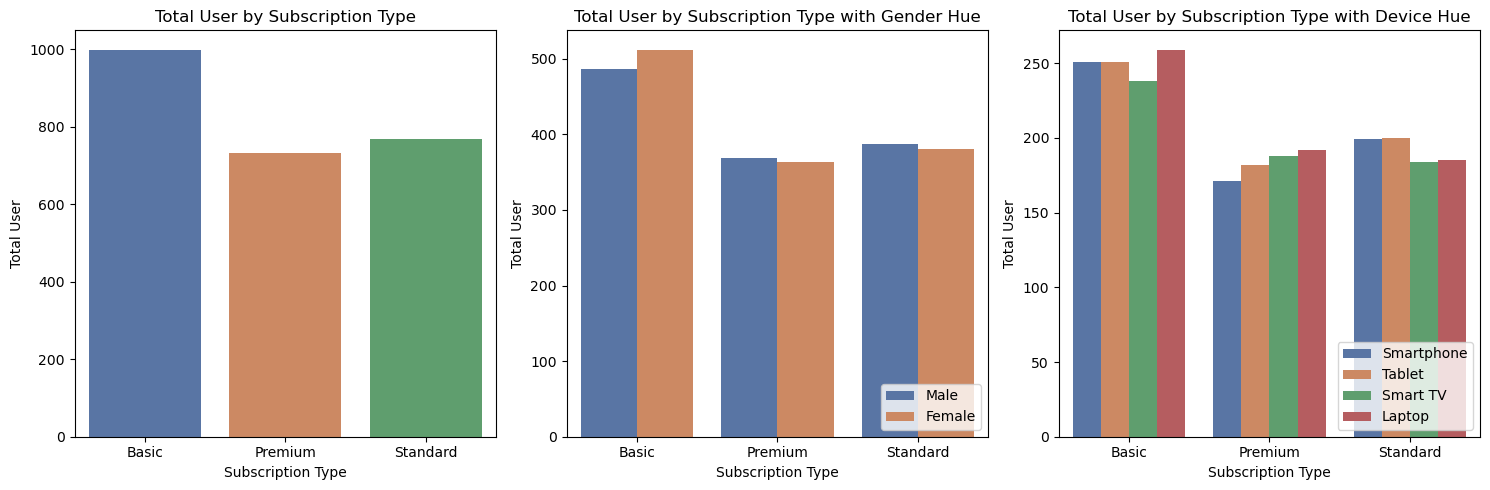

In [94]:
display(df['SUBSCRIPTION_TYPE'].value_counts())

# Create a figure with two subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Total User by Subscription Type
sns.countplot(x='SUBSCRIPTION_TYPE', data=df, ax=axes[0])
axes[0].set_title('Total User by Subscription Type')
axes[0].set_xlabel('Subscription Type')
axes[0].set_ylabel('Total User')

# Plot 2: Total User by Subscription Type with Hue of Gender
sns.countplot(x='SUBSCRIPTION_TYPE', hue='GENDER', data=df, ax=axes[1])
axes[1].set_title('Total User by Subscription Type with Gender Hue')
axes[1].set_xlabel('Subscription Type')
axes[1].set_ylabel('Total User')
axes[1].legend(loc='lower right')

# Plot 3: Total User by Subscription Type with Hue of Device
sns.countplot(x='SUBSCRIPTION_TYPE', hue='DEVICE', data=df, ax=axes[2])
axes[2].set_title('Total User by Subscription Type with Device Hue')
axes[2].set_xlabel('Subscription Type')
axes[2].set_ylabel('Total User')
axes[2].legend(loc='upper right')
axes[2].legend(loc='lower right')

plt.tight_layout()

plt.show()


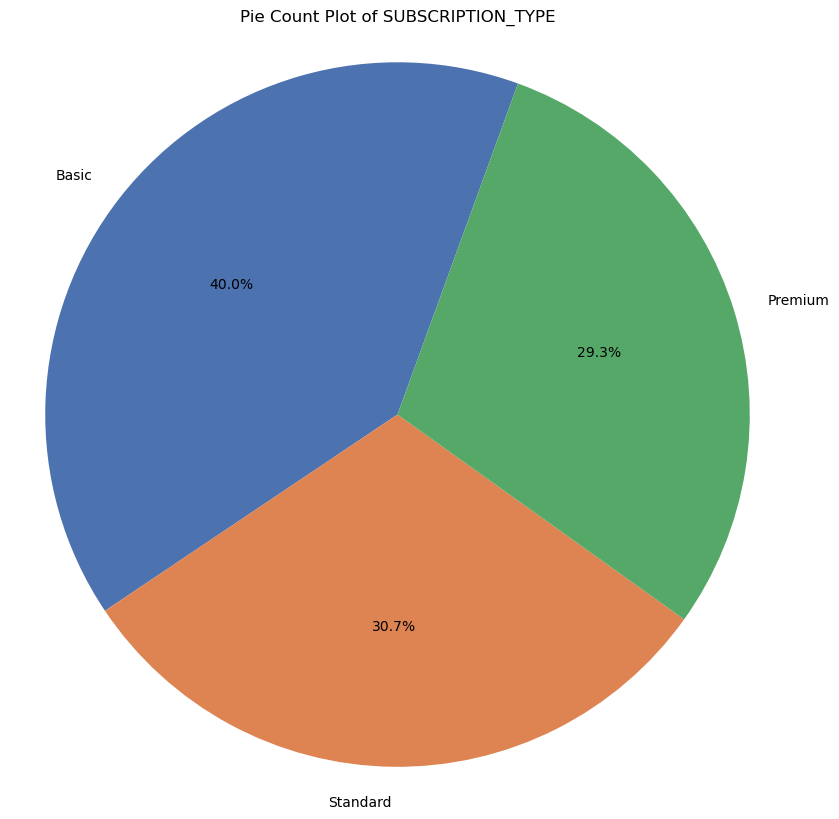

In [95]:
count_pie_plot(df, 'SUBSCRIPTION_TYPE')

In [96]:
df['PLAN_DURATION'].value_counts()

1 Month    2500
Name: PLAN_DURATION, dtype: int64

10    409
11    388
12    455
13    418
14    431
15    399
Name: MONTHLY_REVENUE, dtype: int64

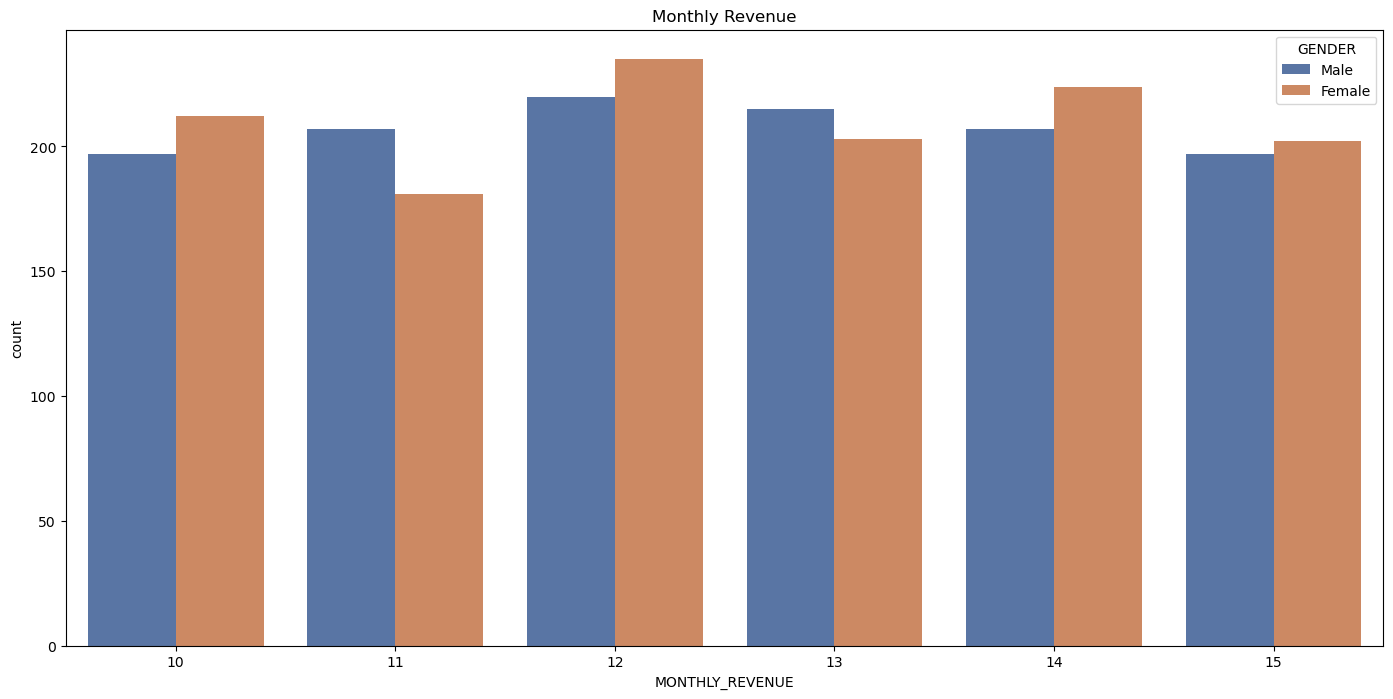

In [97]:
display(df['MONTHLY_REVENUE'].value_counts().sort_index())


plt.figure(figsize=(17,8))
sns.countplot(x='MONTHLY_REVENUE', data=df, hue='GENDER')
plt.title('Monthly Revenue')
plt.show()

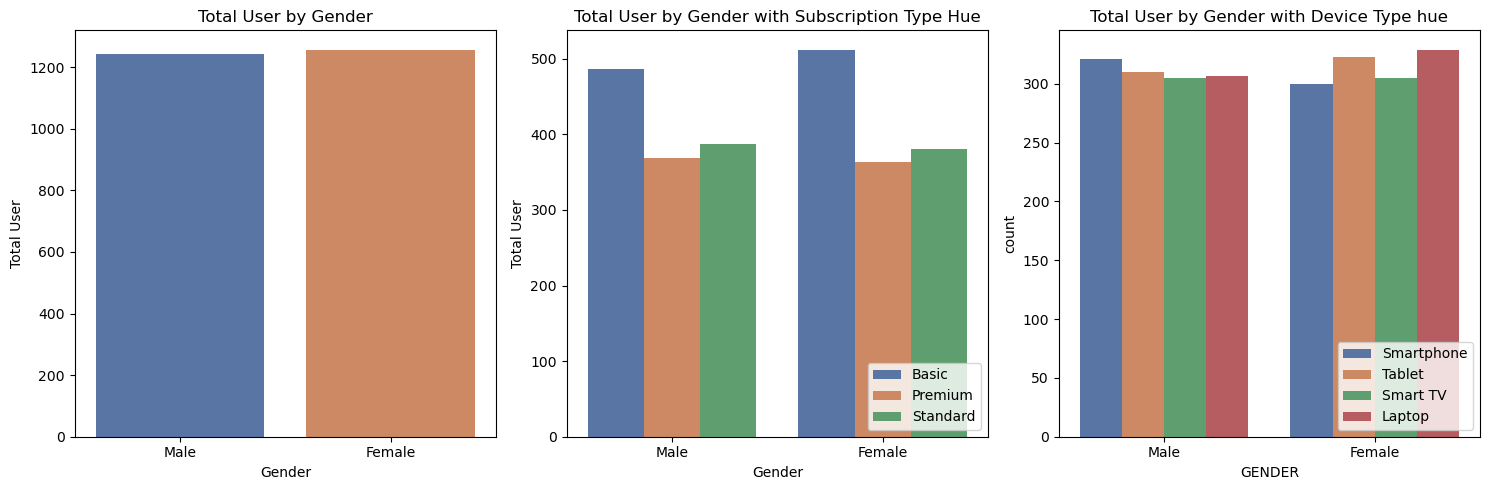

In [98]:
# Create a figure with two subplots
fig, axes = plt.subplots(1,3, figsize=(15,5))

# Plot 1: Total User by Subscription Type
sns.countplot(x='GENDER', data=df, ax=axes[0])
axes[0].set_title('Total User by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Total User')

# Plot 2: Total User by Subscription Type with Hue of Gender
sns.countplot(x='GENDER', hue='SUBSCRIPTION_TYPE', data=df, ax=axes[1])
axes[1].set_title('Total User by Gender with Subscription Type Hue')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Total User')
axes[1].legend(loc='lower right')


# Plot 3: Total User by Gender with hue of Device Type
sns.countplot(x='GENDER', data=df, hue='DEVICE', ax=axes[2])
axes[2].set_title('Total User by Gender with Device Type hue')
axes[2].set_xlabel
axes[2].legend(loc='lower right')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()


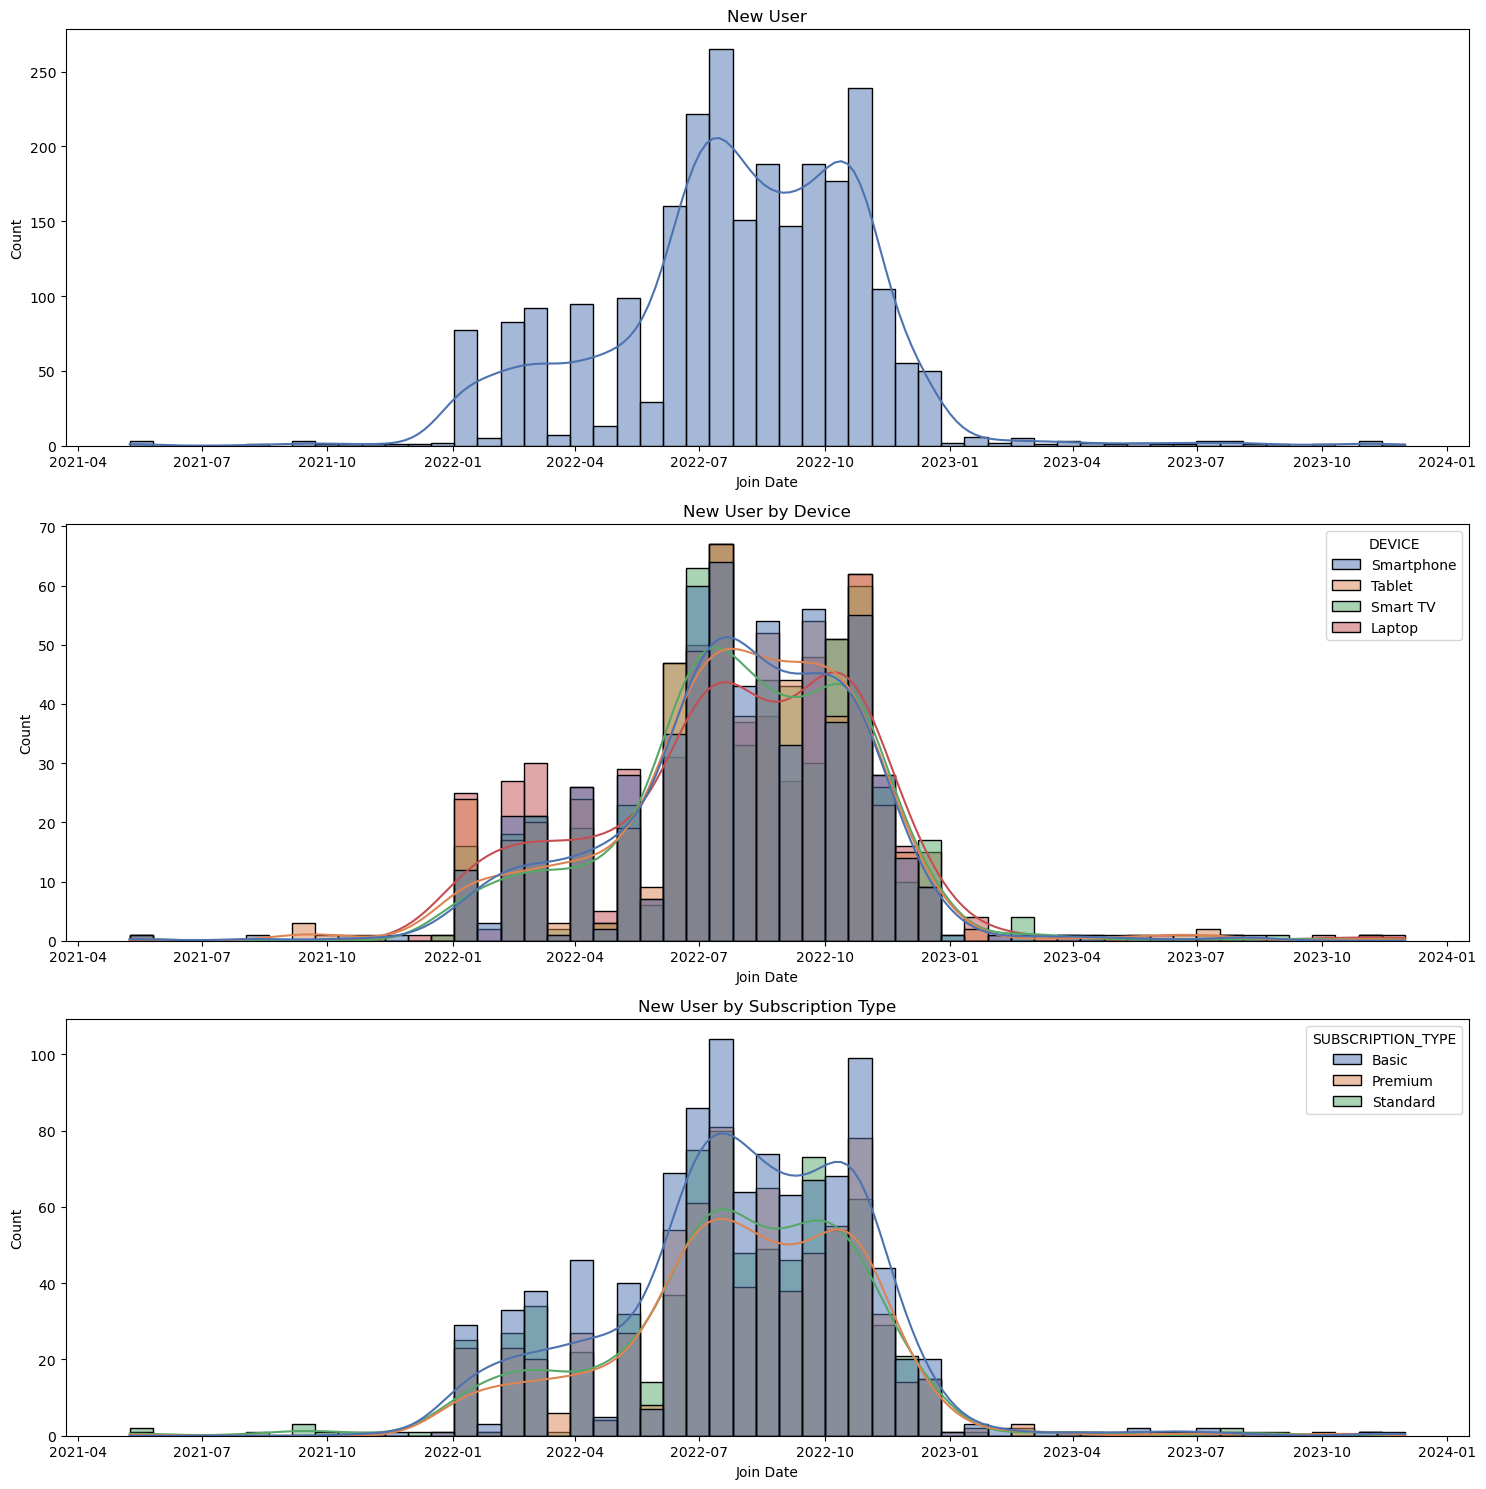

In [99]:
fig, axes = plt.subplots(3,1, figsize=(15,15))


# Plot 1: New User
sns.histplot(data = df, x= 'JOIN_DATE', kde= True, ax= axes[0])
axes[0].set_title('New User')
axes[0].set_xlabel('Join Date')
axes[0].set_ylabel('Count')


# Plot 2: New User by Device
sns.histplot(data= df, x= 'JOIN_DATE', hue='DEVICE', kde= True, ax= axes[1])
axes[1].set_title('New User by Device')
axes[1].set_xlabel('Join Date')
axes[1].set_ylabel('Count')

# Plot 3: New User by Subscription Type
sns.histplot(data= df, x= 'JOIN_DATE', hue='SUBSCRIPTION_TYPE', kde= True, ax= axes[2])
axes[2].set_title('New User by Subscription Type')
axes[2].set_xlabel('Join Date')
axes[2].set_ylabel('Count')


plt.tight_layout()

plt.show()


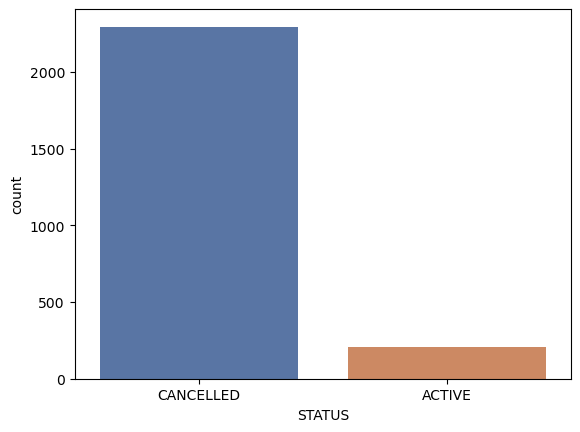

In [100]:
sns.countplot(x='STATUS'
, data=df
)

plt.show()

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 2499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   USER_ID            2500 non-null   int64         
 1   SUBSCRIPTION_TYPE  2500 non-null   object        
 2   MONTHLY_REVENUE    2500 non-null   int64         
 3   JOIN_DATE          2500 non-null   datetime64[ns]
 4   LAST_PAYMENT_DATE  2500 non-null   datetime64[ns]
 5   COUNTRY            2500 non-null   object        
 6   AGE                2500 non-null   int64         
 7   GENDER             2500 non-null   object        
 8   DEVICE             2500 non-null   object        
 9   PLAN_DURATION      2500 non-null   object        
 10  AGE_CATEGORY       2500 non-null   object        
 11  STATUS             2500 non-null   object        
dtypes: datetime64[ns](2), int64(3), object(7)
memory usage: 253.9+ KB


In [102]:
df.LAST_PAYMENT_DATE.dt.month.value_counts().sort_index()

1      131
2      129
3      146
4      131
5      126
6     1011
7      200
8      126
9      154
10     141
11     128
12      77
Name: LAST_PAYMENT_DATE, dtype: int64

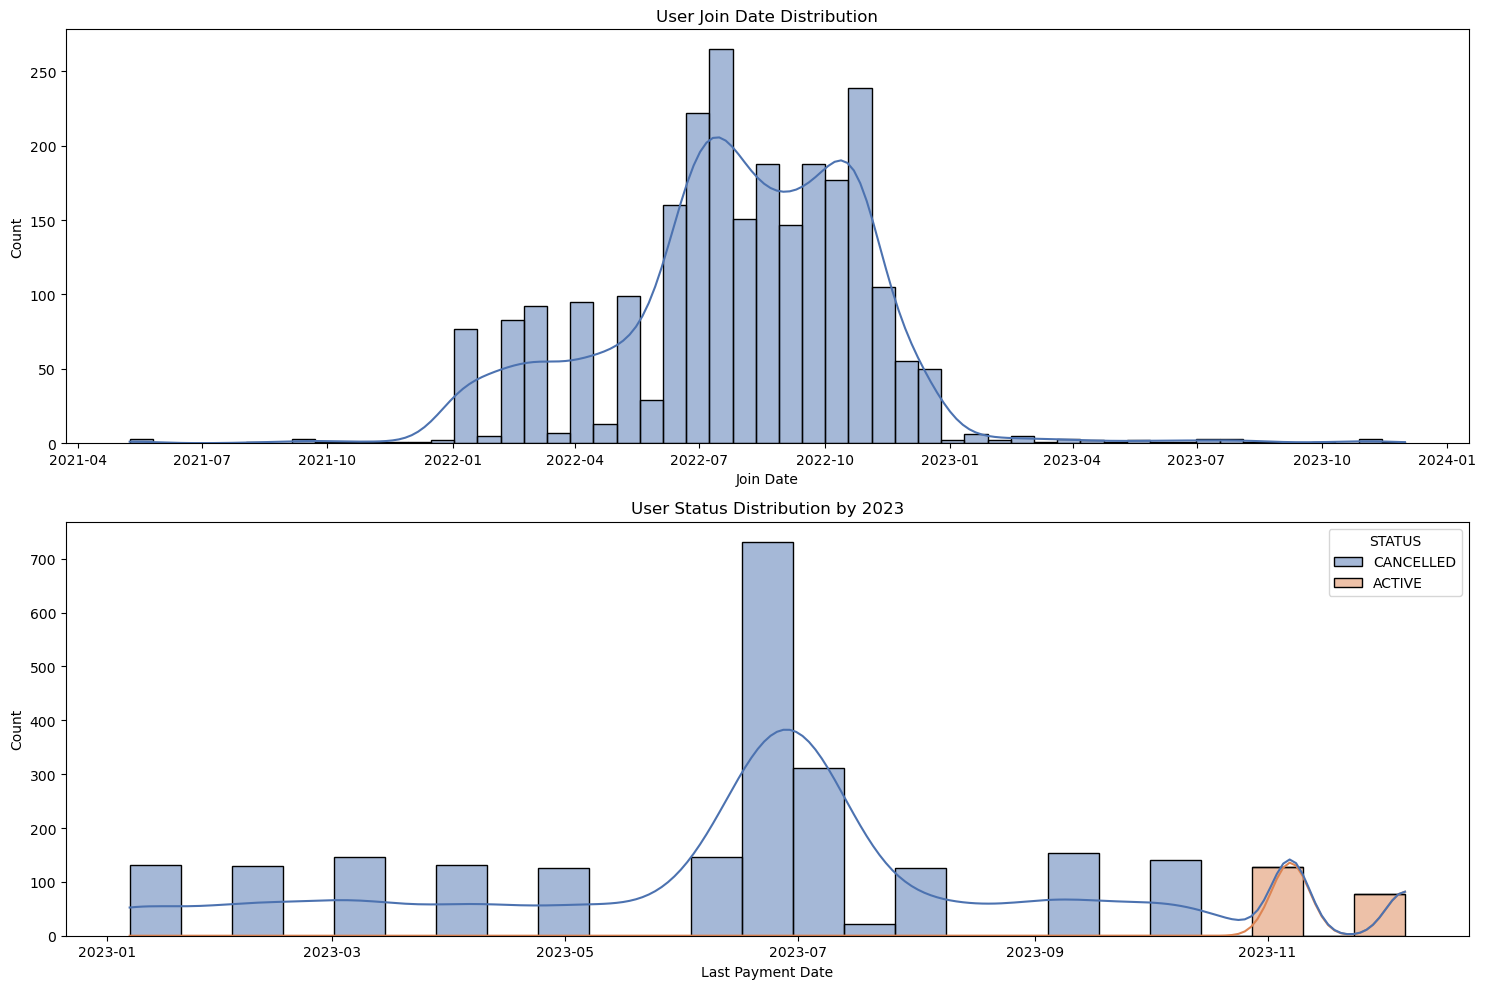

In [103]:
fig, axes = plt.subplots(2,1, figsize=(15,10))

# Join Date Distribution
sns.histplot(data=df, x='JOIN_DATE', multiple='stack',kde=True, ax=axes[0])
axes[0].set_title('User Join Date Distribution')
axes[0].set_xlabel('Join Date')
axes[0].set_ylabel('Count')

# User Status Distribution by 2023
## Use to check when the user stop their subscription
sns.histplot(data=df, x='LAST_PAYMENT_DATE', hue='STATUS', multiple='stack',kde=True, ax=axes[1])
axes[1].set_title('User Status Distribution by 2023')
axes[1].set_xlabel('Last Payment Date')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [104]:
# Checking The Revenue Status

display(pysqldf(
    """
        SELECT
            STATUS,
            ROUND(AVG(MONTHLY_REVENUE),2) AS AVG_MONTHLY_REVENUE
        FROM
            df
        GROUP BY
            STATUS
    """
))

display(df.groupby('STATUS')['MONTHLY_REVENUE'].mean().round(2))

,STATUS,AVG_MONTHLY_REVENUE
0,ACTIVE,12.44
1,CANCELLED,12.51


STATUS
ACTIVE       12.44
CANCELLED    12.51
Name: MONTHLY_REVENUE, dtype: float64

In [105]:
df.groupby('GENDER')['MONTHLY_REVENUE'].mean().round(2)

GENDER
Female    12.52
Male      12.50
Name: MONTHLY_REVENUE, dtype: float64

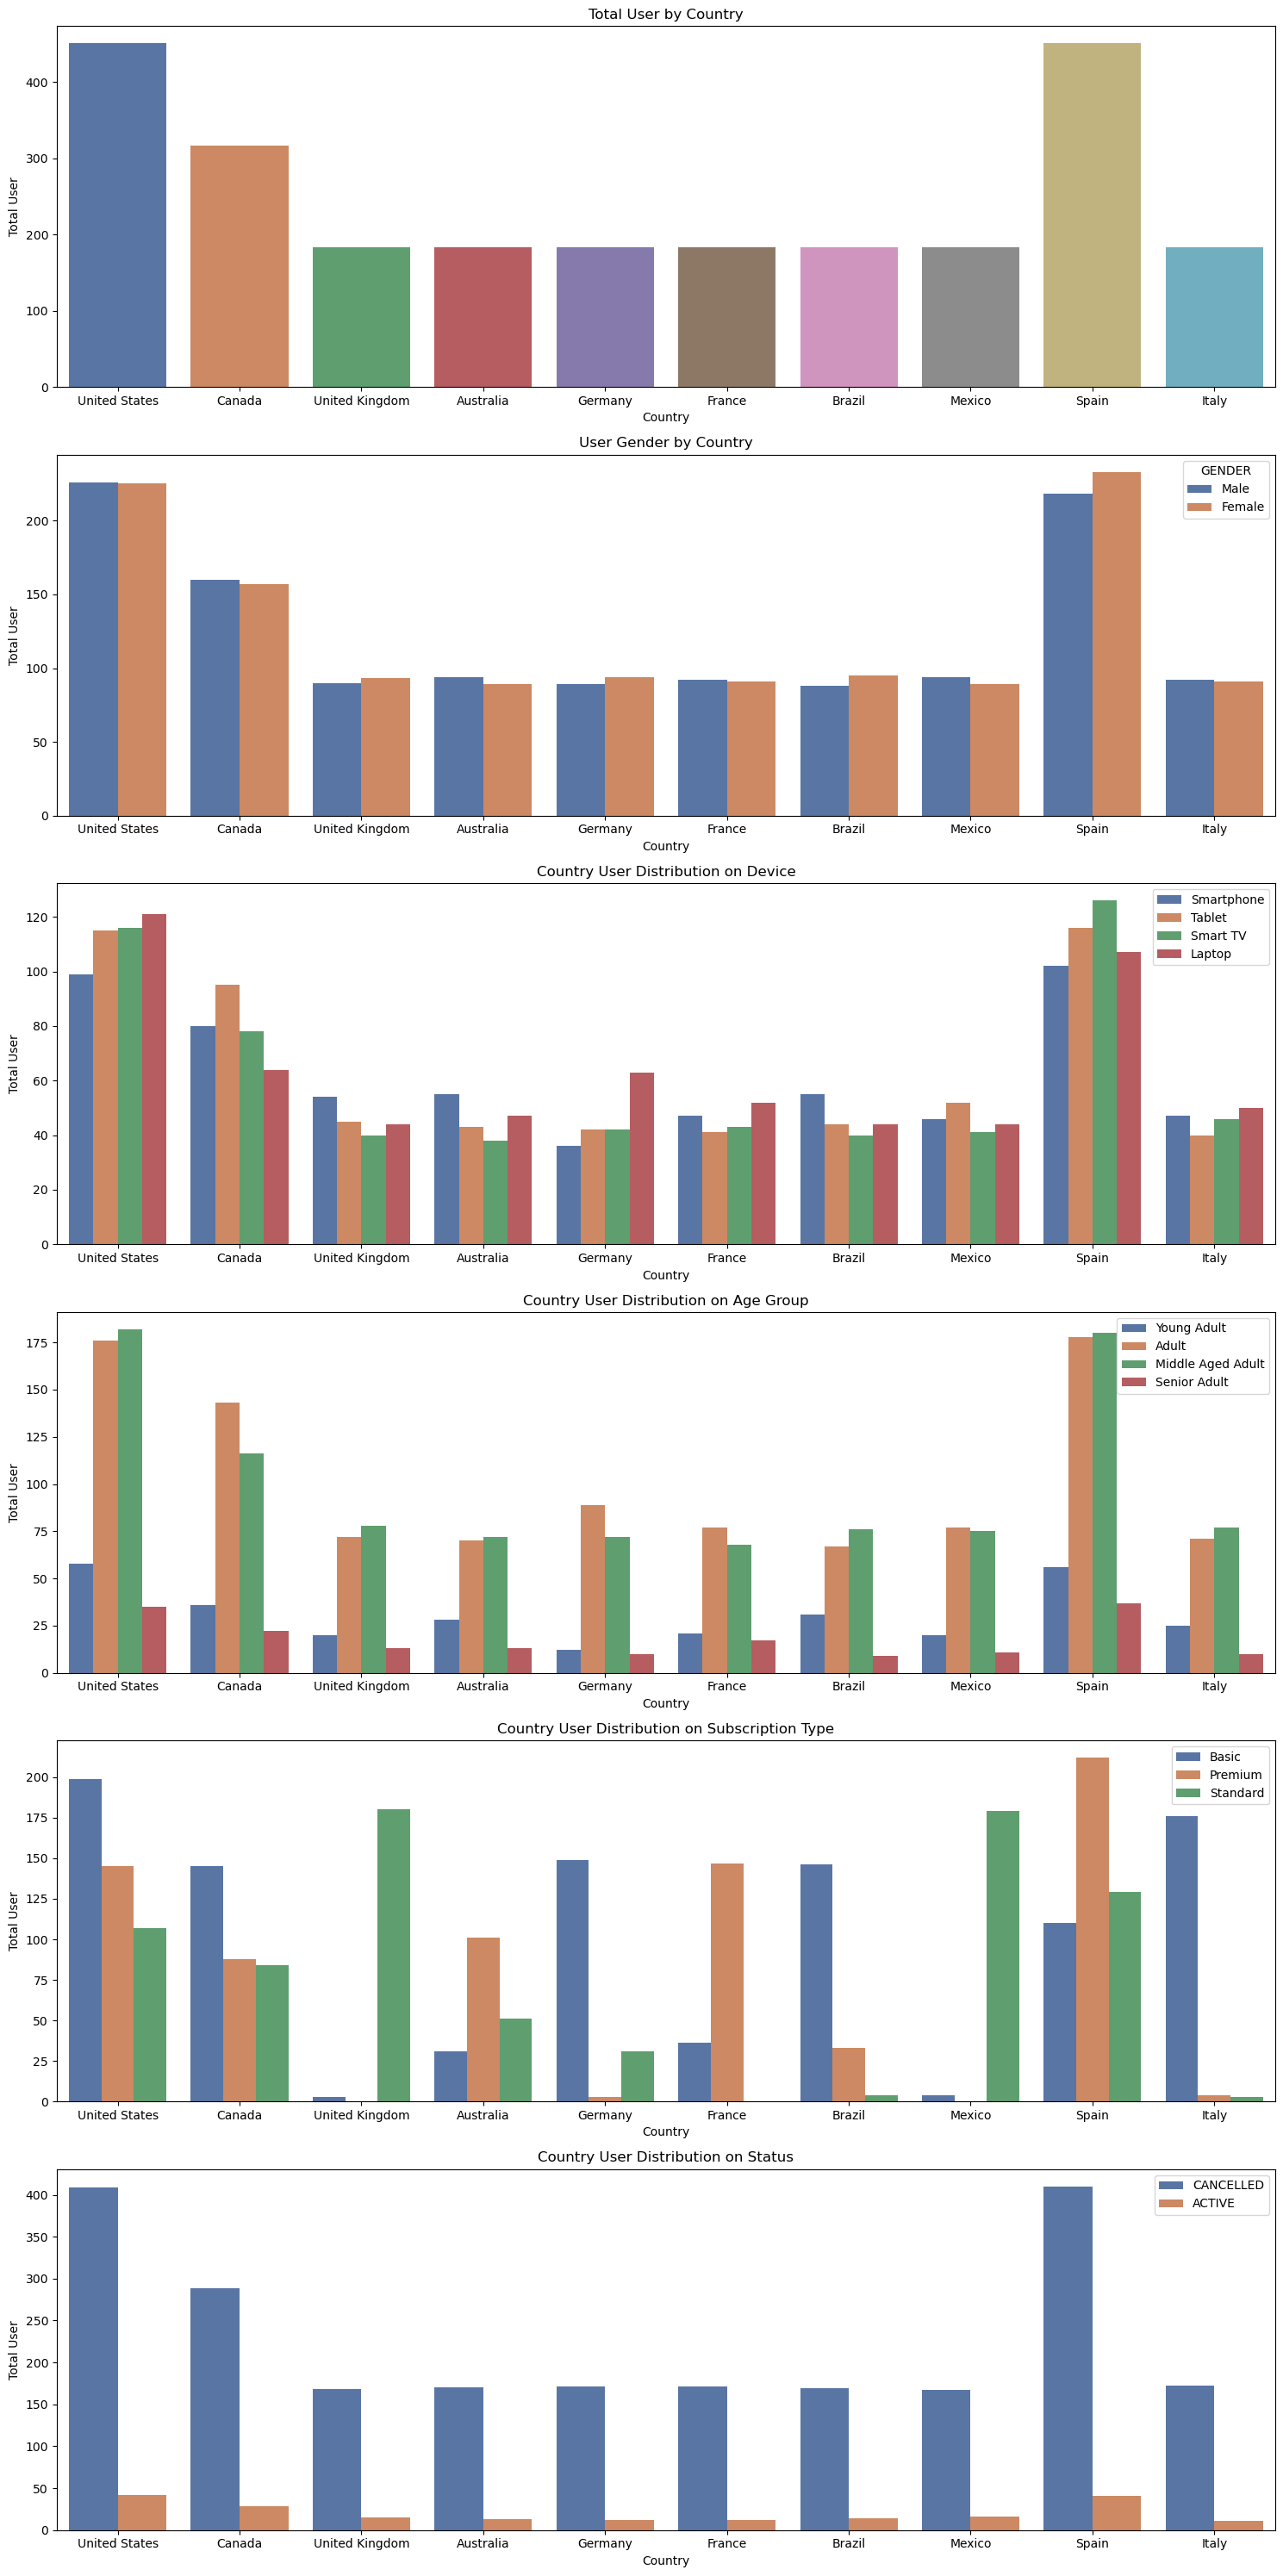

In [106]:
fig, axes = plt.subplots(6, 1, figsize=(15,30))

# Plot 1: Count total user by Country
sns.countplot(x='COUNTRY', data=df, ax=axes[0])
axes[0].set_title('Total User by Country')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Total User')

# Plot 2: User Gender by Country 
sns.countplot(x='COUNTRY', hue='GENDER',data=df, ax=axes[1])
axes[1].set_title('User Gender by Country')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Total User')

# Plot 3: User by Country with hue on age
sns.countplot(x='COUNTRY', hue='DEVICE',data=df, ax=axes[2])
axes[2].set_title('Country User Distribution on Device')
axes[2].legend(loc='upper right')
axes[2].set_xlabel('Country')
axes[2].set_ylabel('Total User')

# Plot 4: User by Country with hue ON Age Group
sns.countplot(x='COUNTRY', hue='AGE_CATEGORY',data=df, ax=axes[3])
axes[3].set_title('Country User Distribution on Age Group')
axes[3].legend(loc='upper right')
axes[3].set_xlabel('Country')
axes[3].set_ylabel('Total User')

# Plot 5: Subscription type by Country
sns.countplot(x='COUNTRY', hue='SUBSCRIPTION_TYPE',data=df, ax=axes[4])
axes[4].set_title('Country User Distribution on Subscription Type')
axes[4].legend(loc='upper right')
axes[4].set_xlabel('Country')
axes[4].set_ylabel('Total User')

# Plot 5: User Status by Country
sns.countplot(x='COUNTRY', hue='STATUS',data=df, ax=axes[5])
axes[5].set_title('Country User Distribution on Status')
axes[5].legend(loc='upper right')
axes[5].set_xlabel('Country')
axes[5].set_ylabel('Total User')



plt.tight_layout()
plt.show()


In [107]:
df.columns

Index(['USER_ID', 'SUBSCRIPTION_TYPE', 'MONTHLY_REVENUE', 'JOIN_DATE',
       'LAST_PAYMENT_DATE', 'COUNTRY', 'AGE', 'GENDER', 'DEVICE',
       'PLAN_DURATION', 'AGE_CATEGORY', 'STATUS'],
      dtype='object')

# Insight